# Finite differences for American options

In [66]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(9, 4), dpi=100)

In [67]:
#Model Parameters

K = 100
S_max = 200
T = 1.0
sigma = 0.2
r = 0.1
M = 20
N = 20
h = S_max/(M+1.0)


# Implicit Euler Scheme

In [68]:
#xj matrix
xj = np.zeros(M+2)
for j in range(0, M+2):
    xj[j] = j*h

delta_t = T/float(N)
t = np.zeros(N+1)

for j in range(0,N+1):
    t[j] = j*delta_t

print (xj)

[  0.           9.52380952  19.04761905  28.57142857  38.0952381
  47.61904762  57.14285714  66.66666667  76.19047619  85.71428571
  95.23809524 104.76190476 114.28571429 123.80952381 133.33333333
 142.85714286 152.38095238 161.9047619  171.42857143 180.95238095
 190.47619048 200.        ]


In [69]:
#A matrix
A = np.zeros((M+2,M+2))

for i in range(M+2):
    
    if i > 0:
        A[i][i-1] = - (sigma*sigma)*(xj[i]*xj[i])/float(2*(h*h))
    
    A[i][i] = (sigma*sigma)*(xj[i]*xj[i])/float(h*h)+ r* xj[i]/h +r
    
    if i < M+1:
        A[i][i+1]=-(sigma*sigma)*(xj[i]*xj[i])/float(2*(h*h)) - r* xj[i]/h

#print ("A Matrix:")
#print (A)

#Payoff
g = np.zeros(M+2)
for i in range(0, M+2):
    g[i] = max(K-xj[i],0)

print (A.shape)

(22, 22)


In [70]:
#P matrix
P = np.zeros((M+2,N+1))
for i in range(0, M+2):
    P[i][0] = g[i]
    
for i in range(0, N):
    temp = np.zeros(M+2)
    temp1 = np.zeros(M+2)
    
    temp = P[:,i]-delta_t*np.matmul(A,P[:,i])
    
    for j in range(0, M+2):
        temp1[j] = max(temp[j], g[j])
        
    P[:,i+1] = temp1
    P[M+1,i+1] = 0

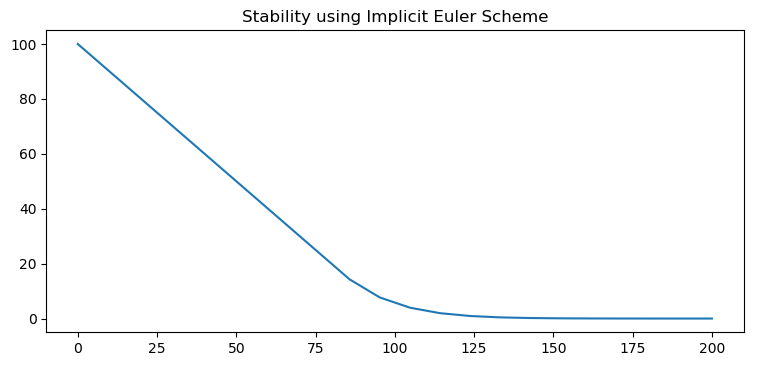

In [71]:
plt.title("Stability using Implicit Euler Scheme")
plt.plot(xj, P[:,N])
plt.show()

# Newton-Raphson algorithm

In [72]:
B  = np.eye(M+2) + delta_t * A

In [73]:
def func(x,B,b,g):
    temp = np.zeros(len(x))
    y = np.matmul(B,x)
    for i in range(0,len(x)):
        temp[i] = min(x[i]-g[i], y[i]-b[i])
    return temp

In [74]:
def derivative(x,B,b,g):
    
    derivative = np.zeros((M+2,M+2))
    y = np.matmul(B,x)
    
    for j in range(M+2):
        
        for i in range(M+2):
            if y[i]-b[i]<=x[i]-g[i]:
                derivative[j][i] = B[j][i]
                
            elif i == j:
                derivative[j][i] = 1
                
            else:
                derivative[j][i] = 0
                
    return derivative

In [75]:
Price = np.zeros((M+2,N+1))

for i in range(0, M+2):
    Price[i][0] = g[i]

In [76]:
K1 = 1000
epsilon = 0.00001

for i in range(0, N):
    
    b = Price[:,i]
    xx = np.zeros(M+2)
    
    for k in range(0,K1): 
        
        fx = func(xx,B,b,g)
        fxder = derivative(xx,B,b,g)
        xx = xx - np.dot(np.linalg.inv(fxder), fx)
        
        if max(np.abs(np.dot(np.linalg.inv(fxder), fx)))< epsilon: 
            break
            
    Price[:,i+1] = xx

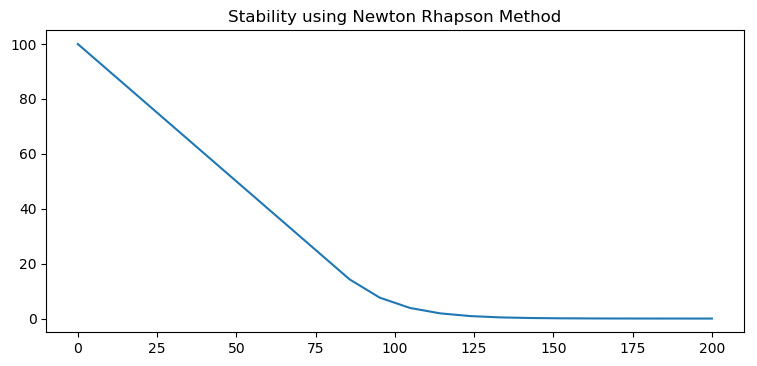

In [77]:
plt.title("Stability using Newton Rhapson Method")
plt.plot(xj, Price[:,N])
plt.show()